In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV
df = pd.read_csv("data/OMNI_dataset_20252026.csv")

# Create Datetime column from Year, DOY, Hour
df['Datetime'] = pd.to_datetime(df['Year'].astype(str) + df['DOY'].astype(str), format='%Y%j') \
                 + pd.to_timedelta(df['Hour'], unit='h')


In [ ]:
# -------------------------------
# 1️⃣ Basic Dataset Info
# -------------------------------
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Year                  9000 non-null   int64         
 1   DOY                   9000 non-null   int64         
 2   Hour                  9000 non-null   int64         
 3   Bz_GSM_nT             9000 non-null   float64       
 4   Proton_Temp_K         9000 non-null   float64       
 5   Proton_Density_cm3    9000 non-null   float64       
 6   Solar_Wind_Speed_kms  9000 non-null   float64       
 7   Flow_Pressure_nPa     9000 non-null   float64       
 8   Kp_x10                9000 non-null   int64         
 9   Kp                    9000 non-null   float64       
 10  Datetime              9000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(4)
memory usage: 773.6 KB
None
              Year          DOY         Hour    Bz_GSM_nT  Prot

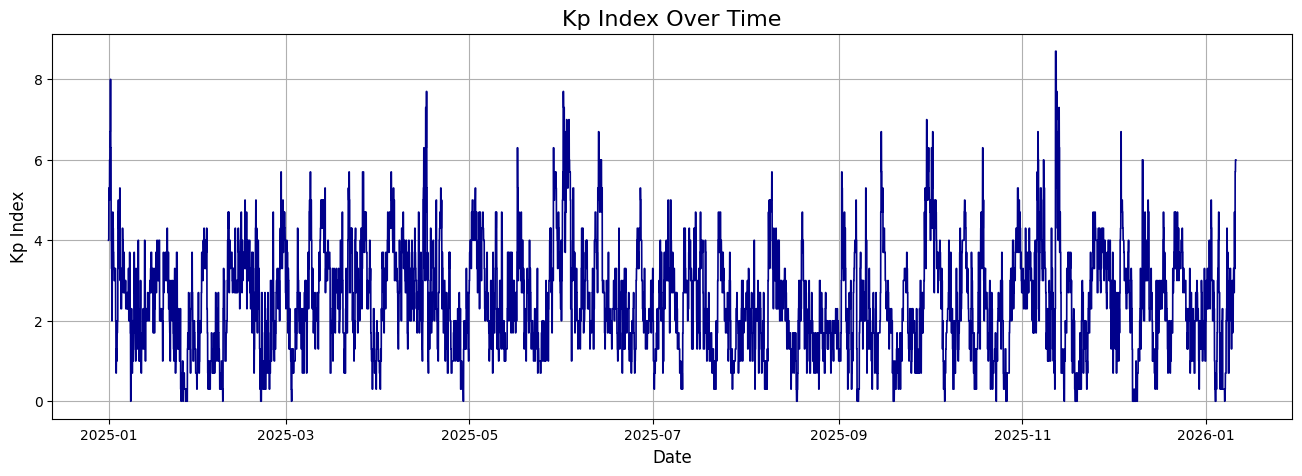

In [ ]:
# -------------------------------
# 2️⃣ Plot Kp over Time
# -------------------------------
plt.figure(figsize=(16,5))
plt.plot(df['Datetime'], df['Kp'], color='darkblue', linewidth=1.2)
plt.title('Kp Index Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Kp Index', fontsize=12)
plt.grid(True)
plt.show()

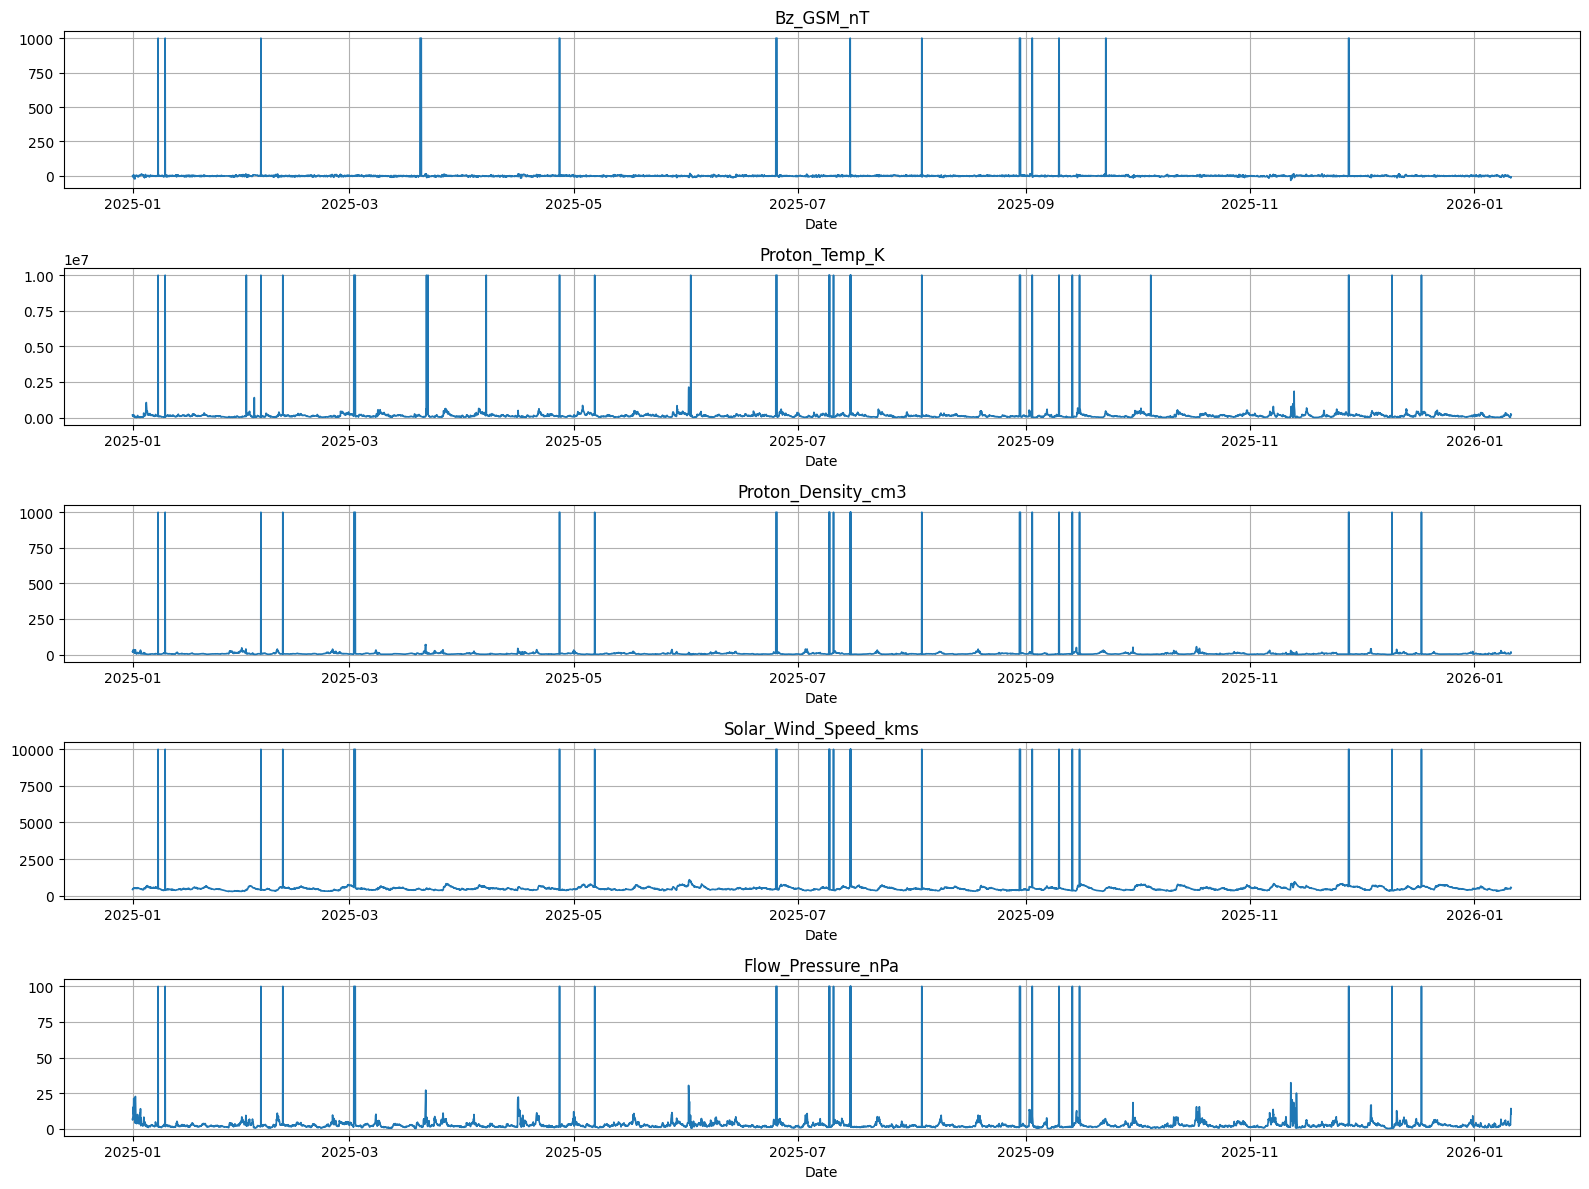

In [4]:
# -------------------------------
# 3️⃣ Plot Solar Wind Parameters
# -------------------------------
solar_params = ['Bz_GSM_nT', 'Proton_Temp_K', 'Proton_Density_cm3', 'Solar_Wind_Speed_kms', 'Flow_Pressure_nPa']

plt.figure(figsize=(16,12))
for i, col in enumerate(solar_params, 1):
    plt.subplot(len(solar_params),1,i)
    plt.plot(df['Datetime'], df[col], linewidth=1.2)
    plt.title(col, fontsize=12)
    plt.xlabel('Date')
    plt.grid(True)
plt.tight_layout()
plt.show()


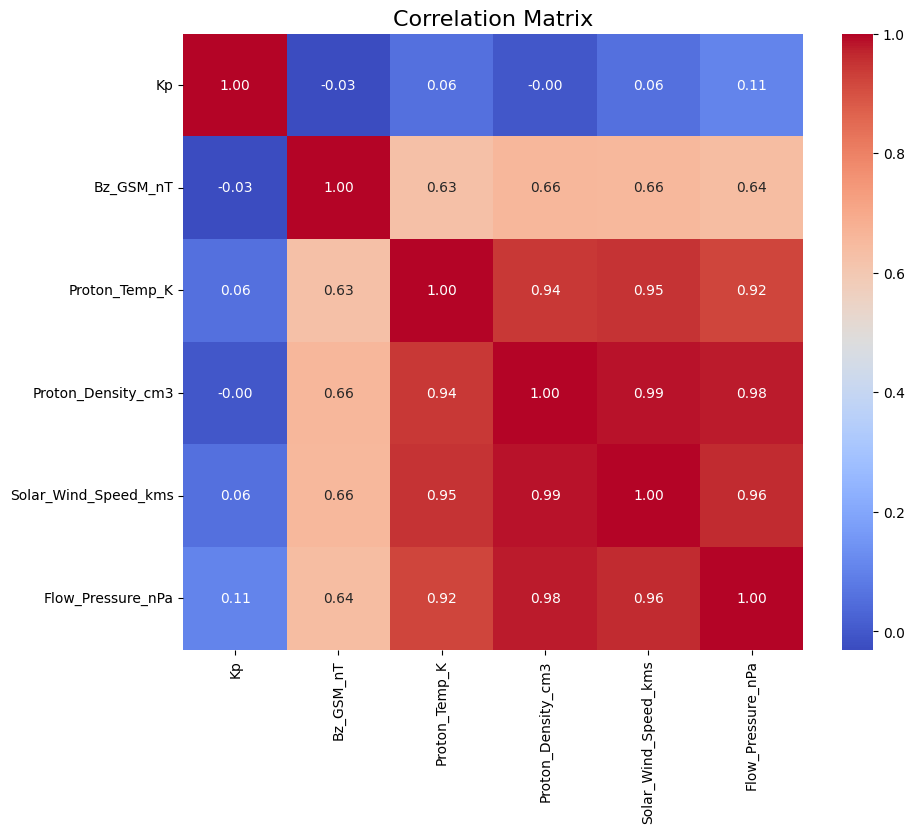

In [5]:
# -------------------------------
# 4️⃣ Correlation Heatmap
# -------------------------------
plt.figure(figsize=(10,8))
sns.heatmap(df[['Kp'] + solar_params].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix', fontsize=16)
plt.show()

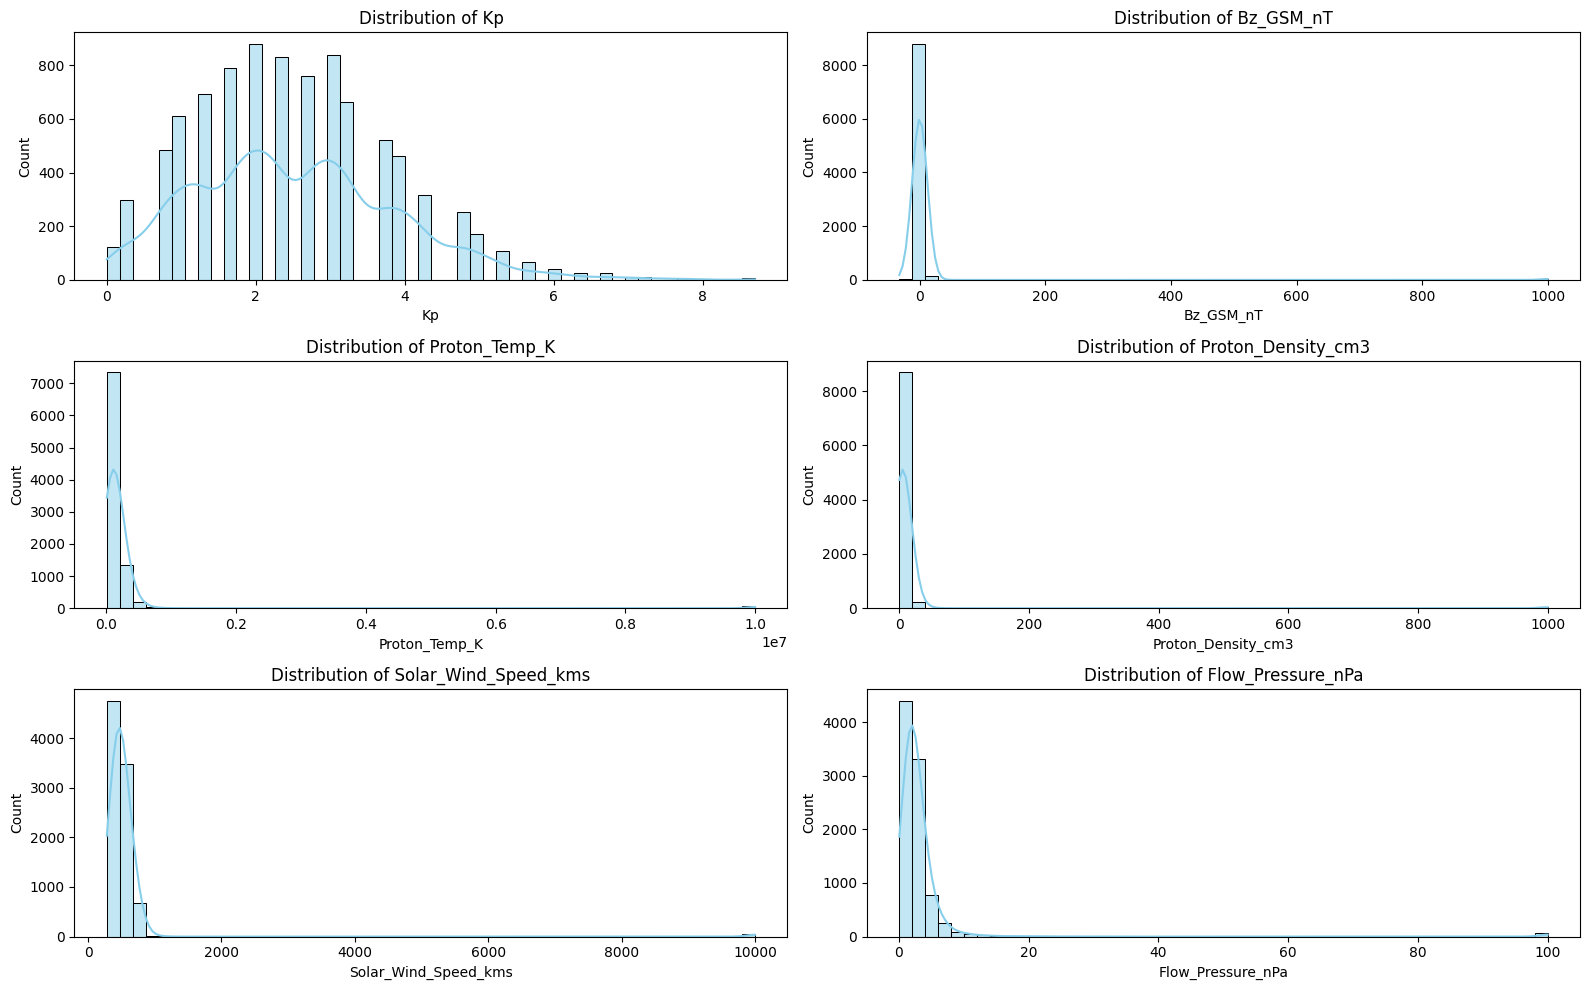

In [ ]:
# Distribution Analysis: Understand the range and skewness to detect anomalies and outliers

plt.figure(figsize=(16,10))
for i, col in enumerate(['Kp'] + solar_params, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True, bins=50, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


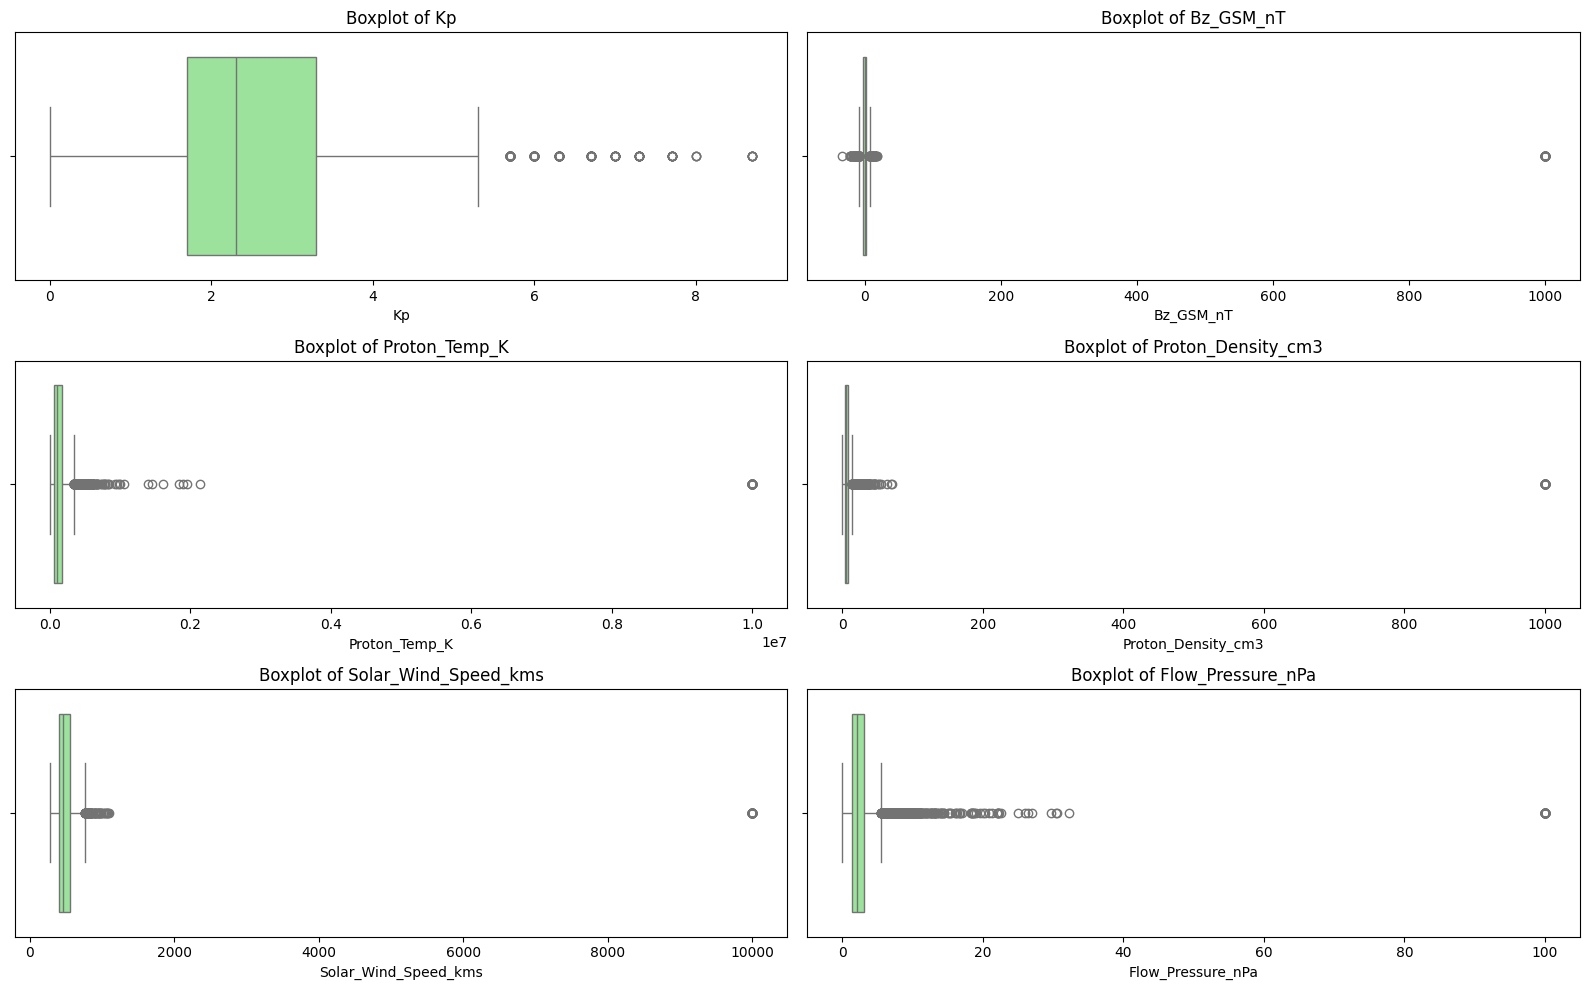

In [8]:
#Boxplots for Outlier Detection: Shows extreme values that might need cleaning.

plt.figure(figsize=(16,10))
for i, col in enumerate(['Kp'] + solar_params, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


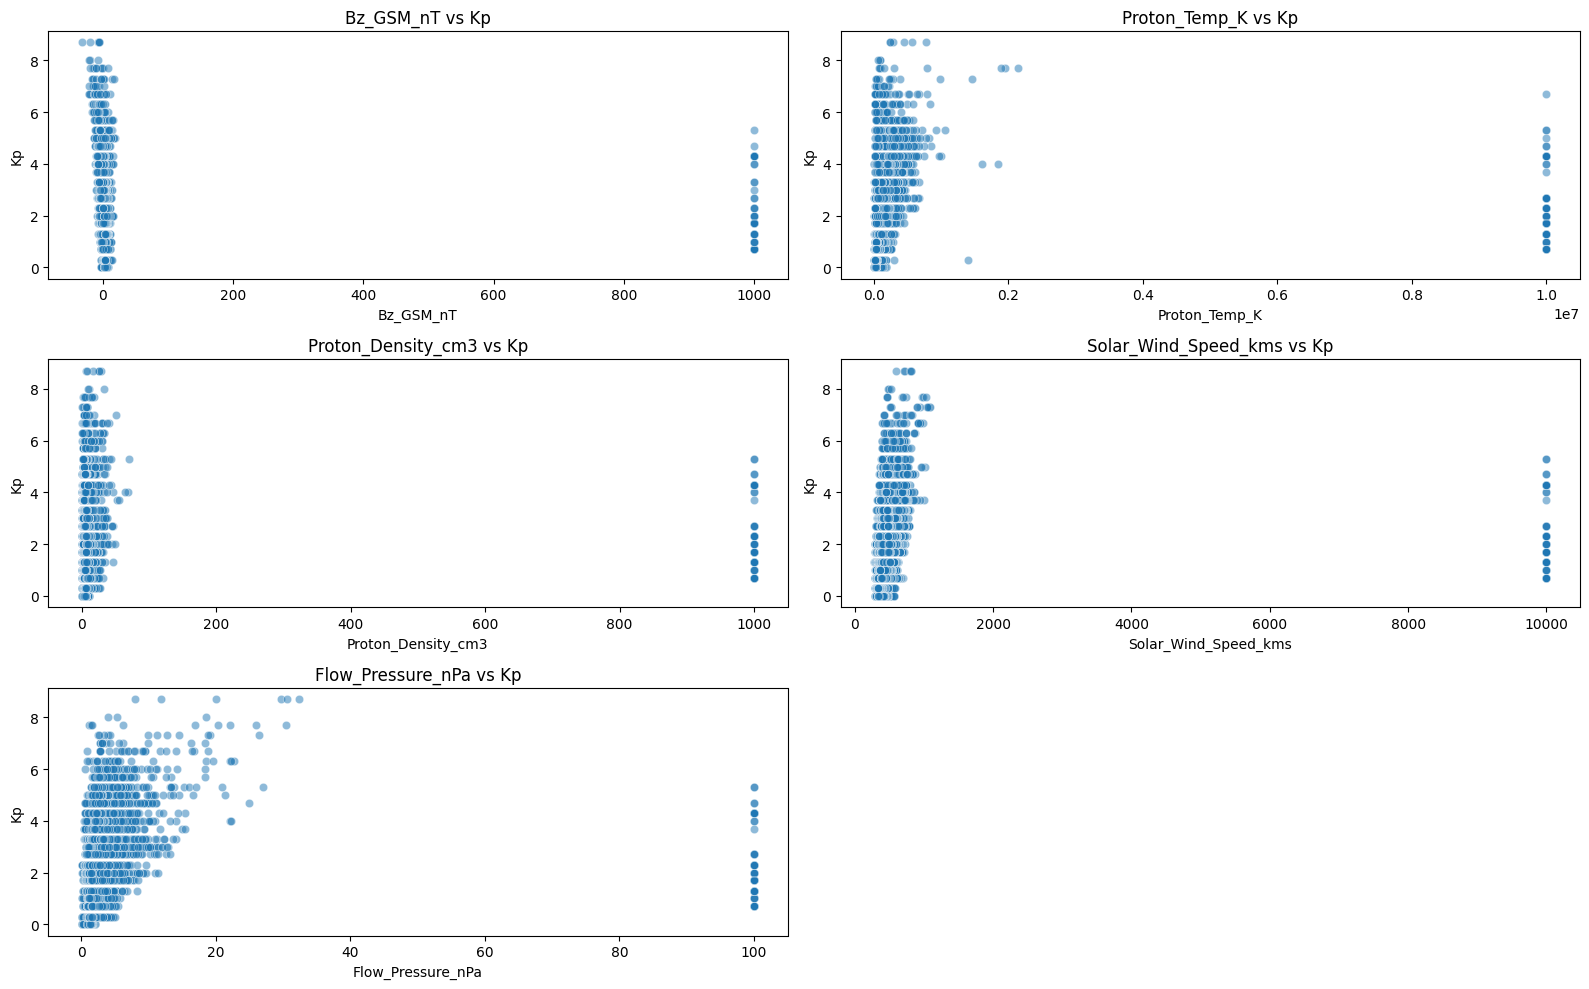

In [9]:
#Scatter Plots vs Kp: Scatter Plots vs Kp

plt.figure(figsize=(16,10))
for i, col in enumerate(solar_params, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x=df[col], y=df['Kp'], alpha=0.5)
    plt.title(f'{col} vs Kp')
plt.tight_layout()
plt.show()


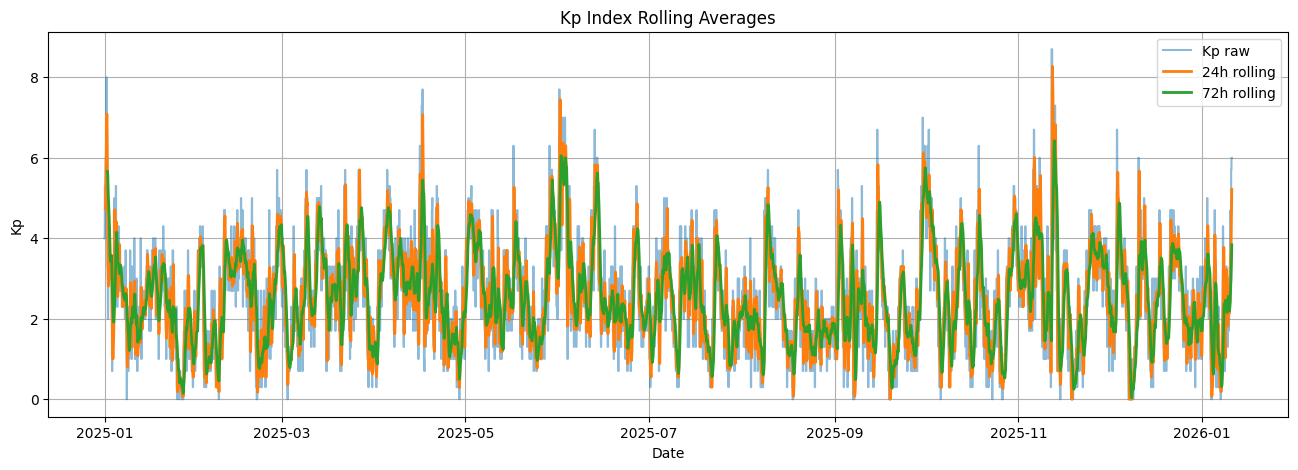

In [10]:
# Trend Analysis: See if there are trends or cycles in Kp. 

df['Kp_rolling_24h'] = df['Kp'].rolling(window=8).mean()  # 8*3hr = 24 hours
df['Kp_rolling_72h'] = df['Kp'].rolling(window=24).mean() # 72 hours

plt.figure(figsize=(16,5))
plt.plot(df['Datetime'], df['Kp'], label='Kp raw', alpha=0.5)
plt.plot(df['Datetime'], df['Kp_rolling_24h'], label='24h rolling', linewidth=2)
plt.plot(df['Datetime'], df['Kp_rolling_72h'], label='72h rolling', linewidth=2)
plt.legend()
plt.title('Kp Index Rolling Averages')
plt.xlabel('Date')
plt.ylabel('Kp')
plt.grid(True)
plt.show()

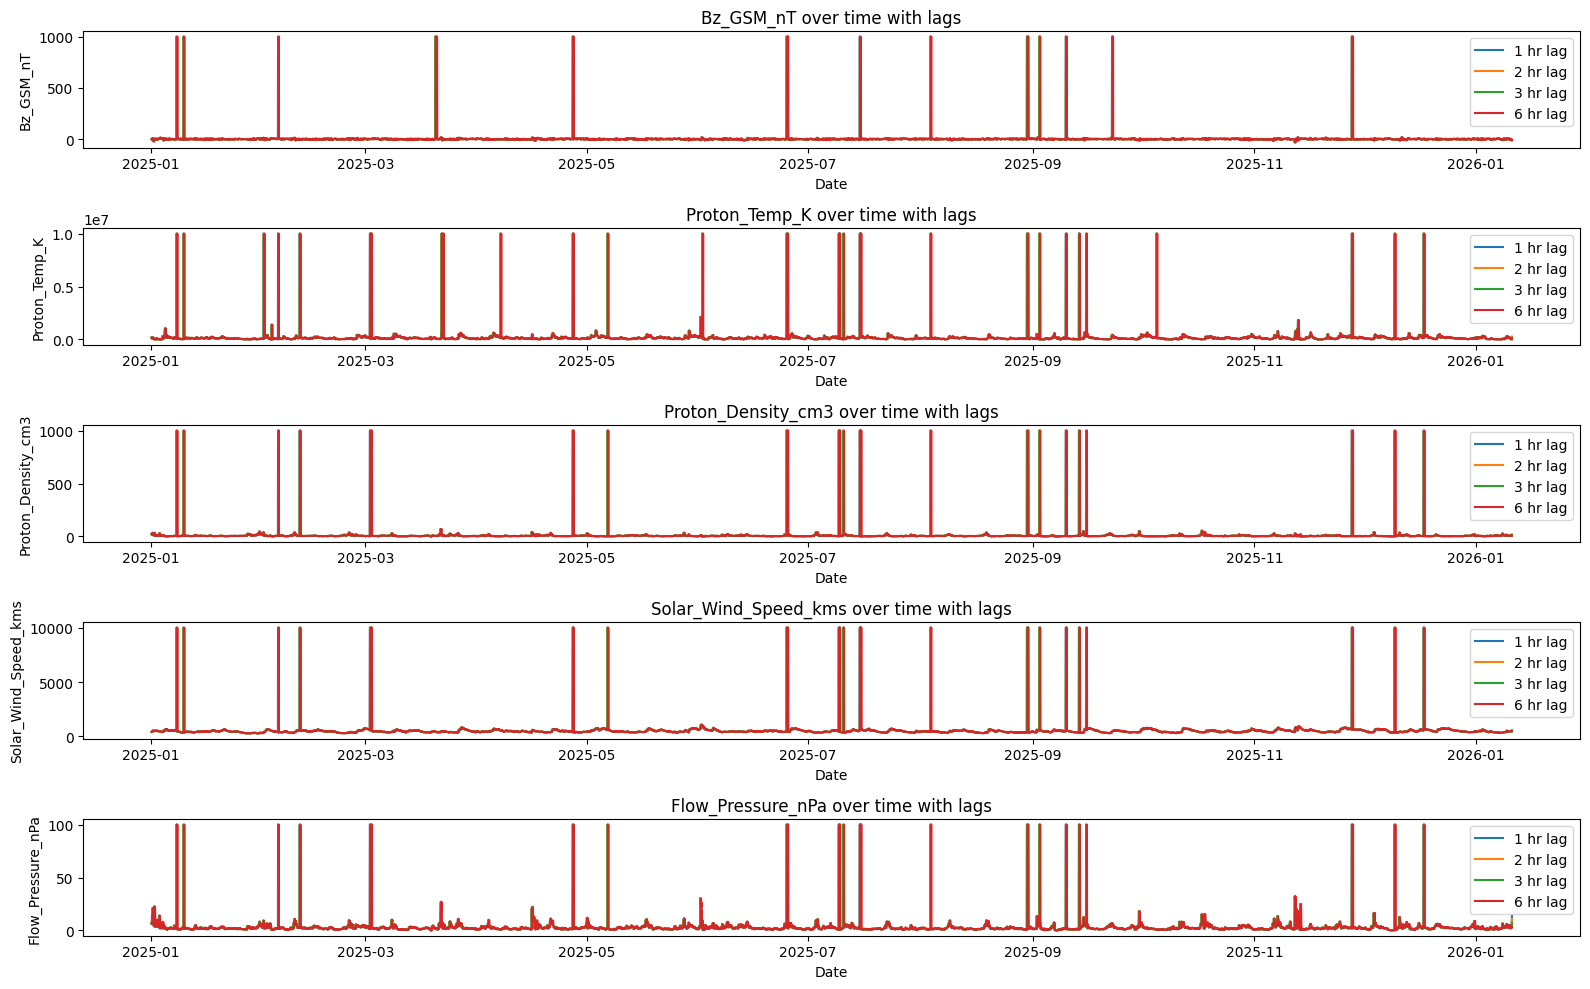

In [11]:
# Feature Correlation Over Time: Feature Correlation Over Time

lags = [1, 2, 3, 6]  # hours
plt.figure(figsize=(16,10))
for i, col in enumerate(solar_params, 1):
    plt.subplot(len(solar_params), 1, i)
    for lag in lags:
        sns.lineplot(x=df['Datetime'], y=df[col].shift(lag), label=f'{lag} hr lag')
    plt.title(f'{col} over time with lags')
    plt.xlabel('Date')
plt.tight_layout()
plt.show()
